Credit Card Fraud Detection Case Study 2024

Keypoints:

1) Getting Data from URL Link
2) Converting URL to DataFrame
3) Data Cleaning and Data Wrangling Process
4) Exploratory Data Analysis EDA 
3) Examine Data by Column's Name and Fixed them
4) Column's DataTypes and Conversion
5) Distribution w.r.t DataTypes
6) Observing data Row wise (Rows,nullRows,duplicates) and Column wise (Cols,Null or Missing values, valid values,Unique values)
7) Data Imputation Process e.g Missing values, Outliers etc.
8) Contextual Analysis and Data Analysis
9) Cross Tabualtion relation between columns
10) Graphical representation using Seaborn and Matplotlib involves bars, piechart,kdplot,jointplot etc
11) Descriptive analysis of numeric data
12) Distribution Analysis
13) Quantile Analysis
14) Correlational Analysis (Linear and Rank Based)
15) Geographical Highlights
16) Reveling insight Fradulent Transactions via Barplots,CrossTabulation and PieCharts  
17) Fradulent Transactions History Analysis 
18) Featured Engineering (cities to lat/long, date to yers,months etc)
19) Data preparation for Machine Learning (Classification Problem)
20) Finding Best Model for Classification problem 
21) Multiple Model Analysis via Accuracy Metrics
22) Testing RandomOversample and Undersampler
23) Generating HTML Report 

Note: This data set is for learning perspective only, as its the mixture of two datasets(mockaroo (Mock Data) + european data).The data with columns V1,V2,V3..V28 are the Principle components obtained with PCA. 


In [3]:
# Import Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib as plt
import matplotlib.pyplot as plt
import requests


from io import StringIO



Seaborn theme setting

In [4]:
# 'darkgrid'
# 'whitegrid'
# 'dark'
# 'white'
# 'ticks'
# Apply the default theme
# sns.set_theme(style='whitegrid')
sns.set_theme(style='whitegrid', palette='pastel')
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:10]

In [5]:
# Default Images Directory
image_S='Images/'

Reading URL from a file, and then getting URL response and then converting it to DataFrame

In [6]:
with open('Rana_Util/URL_Link.txt', 'r') as file:
    # Read the URL from the file
    url = file.readline().strip()




# Send an HTTP GET request to the server
response = requests.get(url)

if response.status_code == 200:
    # Read the content of the response
    file_contents = response.text
    
    # Convert the string to a StringIO object
    file_object = StringIO(file_contents)
    
    # Read the StringIO object as a DataFrame
    df = pd.read_csv(file_object)
    
    # Now you can work with the DataFrame 'df'
    print(df.head(2))
else:
    print("Failed to fetch the file. Status code:", response.status_code)

   Unnamed: 0 transaction_date !@#$%^&*()%Gender Age_Group Transaction_City  \
0           0       08/12/2023            Female   Over 45         Rochdale   
1           1       22/09/2022             Other  25 to 30             Kent   

  Merchant_Type   Card_Type Device_OS  !@$Amount  Unnamed: 9  ...       V20  \
0        Travel  Debit Card       iOS     149.62         0.0  ...  0.251412   
1        Retail      Paypal   Android       2.69         0.0  ... -0.069083   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558   
1 -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983   

        V28  is_Fraudulent  
0 -0.021053              0  
1  0.014724              0  

[2 rows x 39 columns]


In [7]:
csv_file_path = 'DataSet/Fraud_Credit_Card_sample.csv'
df_sample=df.head(100)
# Save the DataFrame as a CSV file
df_sample.to_csv(csv_file_path, index=False)

Top 5 Rows

In [8]:
df.head(5)

,Unnamed: 0,transaction_date,!@#$%^&*()%Gender,Age_Group,Transaction_City,Merchant_Type,Card_Type,Device_OS,!@$Amount,Unnamed: 9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,is_Fraudulent
0,0,08/12/2023,Female,Over 45,Rochdale,Travel,Debit Card,iOS,149.62,0.0,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1,22/09/2022,Other,25 to 30,Kent,Retail,Paypal,Android,2.69,0.0,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,2,07/07/2021,Other,31 to 35,Rochdale,Retail,Paypal,Windows,378.66,1.0,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,3,14/10/2023,Female,25 to 30,Southampton,Entertainment,Credit Card,Android,123.50,1.0,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,4,08/12/2023,Other,Over 45,London,Entertainment,Credit Card,iOS,69.99,2.0,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Bottom 5 rows

In [9]:
df.tail()

,Unnamed: 0,transaction_date,!@#$%^&*()%Gender,Age_Group,Transaction_City,Merchant_Type,Card_Type,Device_OS,!@$Amount,Unnamed: 9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,is_Fraudulent
284802,284802,18/07/2022,Other,20 to 25,Bradford,Retail,Credit Card,iOS,0.77,172786.0,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,284803,04/06/2023,Other,25 to 30,Rochdale,Travel,Paypal,Android,24.79,172787.0,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,284804,17/11/2021,Female,31 to 35,Southampton,Retail,Debit Card,iOS,67.88,172788.0,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,284805,26/06/2021,Other,36 to 45,Preston,Travel,Credit Card,iOS,10.00,172788.0,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0
284806,284806,21/04/2022,Female,20 to 25,Salford,Travel,Paypal,Windows,217.00,172792.0,...,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0


Lets start with the general information regarding data and perform Data Cleaning and Wrangling

In [10]:
df.columns

Index(['Unnamed: 0', 'transaction_date', '!@#$%^&*()%Gender', 'Age_Group',
       'Transaction_City', 'Merchant_Type', 'Card_Type', 'Device_OS',
       '!@$Amount', 'Unnamed: 9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'is_Fraudulent'],
      dtype='object')

It can be observed that there is something wrong with the data column names e.g Unnamed cols, Special characters, Numeric column name or spaces between names etc.

['Unnamed: 0', 'transaction_date', '!@#$%^&*()%Gender', 'Age_Group',
       'Transaction_City', 'Merchant_Type', 'Card_Type', 'Device_OS',
       '!@$Amount', 'Unnamed: 9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'is_Fraudulent'],

Method to fix the column names, e.g. Names as Title, extra spaces issues, removing special characters, handling numeric column names, dealing with the unnammed columns etc.


In [11]:
# Note: Its a generic function so will work with every kind of dataset, just need to pass the dataframe as argument.


def fix_Columns(data):
    #Column Fixer
    #Lower Case the Columns
    data.columns = data.columns.map(str.casefold)
    #Column's naming convention as Title 
    data.columns = data.columns.str.title()

    # remove all the leading (spaces at the beginning) and trailing (spaces at the end)
    data.columns = data.columns.str.strip()


    # remove non-word characters
    data.columns = data.columns.str.replace('\W', '', regex=True)

    

    data.columns = ["Col_"+str(a) if a.isnumeric()  else a for i, a in enumerate(data.columns)]
    data.columns = ["Column_"+str(i) if 'Unnamed' in a  else a for i, a in enumerate(data.columns)]


    return data


Creating Dataframe of Columns, with before and after transformation for comparison purpose, Now Columns names are fixed.



In [12]:

col_DF=pd.DataFrame(columns=['Columns_Before','Columns_After_Transformation'])
col_before=df.columns
col_DF['Columns_Before']=col_before


fixed_df_cols=fix_Columns(df)
col_DF['Columns_After_Transformation']=fixed_df_cols.columns
col_DF


,Columns_Before,Columns_After_Transformation
0,Unnamed: 0,Column_0
1,transaction_date,Transaction_Date
2,!@#$%^&*()%Gender,Gender
3,Age_Group,Age_Group
4,Transaction_City,Transaction_City
5,Merchant_Type,Merchant_Type
6,Card_Type,Card_Type
7,Device_OS,Device_Os
8,!@$Amount,Amount
9,Unnamed: 9,Column_9


Droping unwanted columns

In [13]:
# Drop two columns
fixed_df_cols = fixed_df_cols.drop(columns=['Column_0', 'Column_9'])

As noticed, for some columns like 'Transaction_Date' data type is showing as object not a Date.

In [14]:
fixed_df_cols.dtypes

Transaction_Date     object
Gender               object
Age_Group            object
Transaction_City     object
Merchant_Type        object
Card_Type            object
Device_Os            object
Amount              float64
V1                  float64
V2                  float64
V3                  float64
V4                  float64
V5                  float64
V6                  float64
V7                  float64
V8                  float64
V9                  float64
V10                 float64
V11                 float64
V12                 float64
V13                 float64
V14                 float64
V15                 float64
V16                 float64
V17                 float64
V18                 float64
V19                 float64
V20                 float64
V21                 float64
V22                 float64
V23                 float64
V24                 float64
V25                 float64
V26                 float64
V27                 float64
V28                 

In [15]:

col_DTypes=pd.DataFrame(columns=['Columns_Names','Cols_Dtypes_Before','Cols_Dtypes_After'])
col_DTypes['Columns_Names']=fixed_df_cols.columns
col_DTypes['Cols_Dtypes_Before']=fixed_df_cols.dtypes.to_list()

fixed_df_cols['Transaction_Date'] = pd.to_datetime(fixed_df_cols['Transaction_Date'], format='%d/%m/%Y')

fixed_df_cols=fixed_df_cols.convert_dtypes()

col_DTypes['Cols_Dtypes_After']= fixed_df_cols.dtypes.to_list()
# col_DTypes
col_DTypes



# fixed_df_cols.head(10)

,Columns_Names,Cols_Dtypes_Before,Cols_Dtypes_After
0,Transaction_Date,object,datetime64[ns]
1,Gender,object,string
2,Age_Group,object,string
3,Transaction_City,object,string
4,Merchant_Type,object,string
5,Card_Type,object,string
6,Device_Os,object,string
7,Amount,float64,Float64
8,V1,float64,Float64
9,V2,float64,Float64


In [16]:

DTypes_count=pd.DataFrame(columns=['DataType','Columns_Count'])
# DTypes_count['DataType']=
DTypes_count['DataType']=col_DTypes['Cols_Dtypes_After'].value_counts().index
DTypes_count['Columns_Count']=col_DTypes['Cols_Dtypes_After'].value_counts().to_list()

DTypes_count['Percentage']=round((DTypes_count['Columns_Count']/DTypes_count['Columns_Count'].sum()) * 100,0)
DTypes_count

,DataType,Columns_Count,Percentage
0,Float64,29,78.0
1,string,6,16.0
2,datetime64[ns],1,3.0
3,Int64,1,3.0


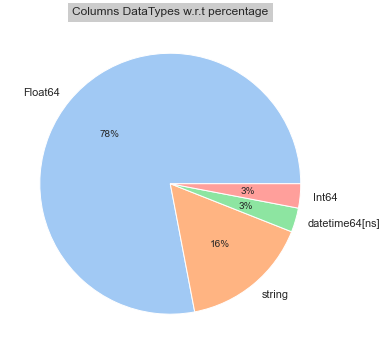

In [17]:
plt.figure(figsize=(6, 6))
plt.pie(DTypes_count['Percentage'], labels = DTypes_count['DataType'].value_counts().index, colors = colors, autopct='%.0f%%')

plt.title("Columns DataTypes w.r.t percentage", bbox={'facecolor':'0.8', 'pad':5})
plt.savefig(image_S+"pie_chart_data_types.png", format='png', bbox_inches='tight')

plt.show()

Lets observe the Rows and Columns

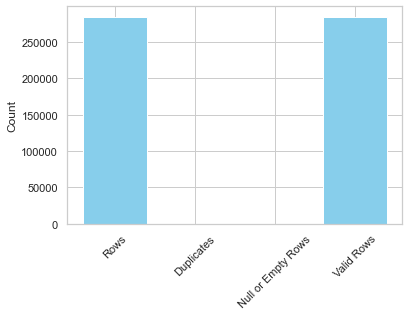

In [18]:
nRows=fixed_df_cols.shape[0]
nCols=fixed_df_cols.shape[1]

num_duplicates = fixed_df_cols.duplicated().sum()
num_null_rows = fixed_df_cols.isnull().any(axis=1).sum()
valid_rows=nRows - num_null_rows - num_duplicates

# Create labels and counts for plotting
labels = ['Rows', 'Duplicates', 'Null or Empty Rows','Valid Rows']
counts = [nRows, num_duplicates, num_null_rows,valid_rows]



plt.bar(labels, counts, color='skyblue')
plt.xticks(rotation=45)
# plt.xlabel('Category')
plt.ylabel('Count')
# plt.title('Rows Analysis')
plt.savefig(image_S+"Rows_analysis.png", format='png', bbox_inches='tight')
plt.show()



Column Analysis

Observe the data with null/non-null and unique values to understand categorical and non-categorical columns.Categorical can be useful for the classification problems. Note: The null-values count explains the empty or missing data in each column to understand the columns.

In [19]:
col_Meta=col_DTypes
col_Meta=col_Meta.drop(['Cols_Dtypes_Before'], axis=1)
col_Meta['Non_Null_Values']=fixed_df_cols.notnull().sum().to_list()
col_Meta['Null_Values']=fixed_df_cols.isnull().sum().to_list()


col_Meta

,Columns_Names,Cols_Dtypes_After,Non_Null_Values,Null_Values
0,Transaction_Date,datetime64[ns],284807,0
1,Gender,string,284793,14
2,Age_Group,string,284783,24
3,Transaction_City,string,284783,24
4,Merchant_Type,string,284807,0
5,Card_Type,string,284807,0
6,Device_Os,string,284798,9
7,Amount,Float64,284797,10
8,V1,Float64,284789,18
9,V2,Float64,284807,0


In [20]:

meta_with_NullValues=col_Meta[col_Meta['Null_Values']>0]

meta_with_NullValues

,Columns_Names,Cols_Dtypes_After,Non_Null_Values,Null_Values
1,Gender,string,284793,14
2,Age_Group,string,284783,24
3,Transaction_City,string,284783,24
6,Device_Os,string,284798,9
7,Amount,Float64,284797,10
8,V1,Float64,284789,18
13,V6,Float64,284795,12
15,V8,Float64,284801,6
23,V16,Float64,284799,8


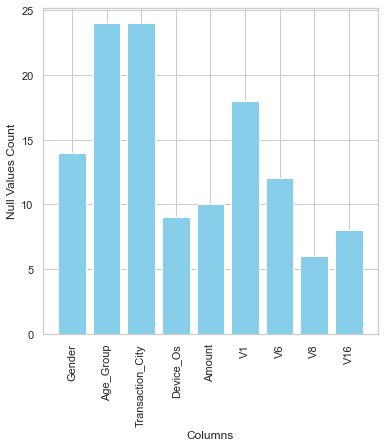

In [21]:

plt.figure(figsize=(6, 6)) 

# Create labels and counts for plotting
labels = meta_with_NullValues['Columns_Names']
counts = meta_with_NullValues['Null_Values']



plt.bar(labels, counts, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Null Values Count')
# plt.title('Rows Analysis')
plt.savefig(image_S+"Columns_missing_values.png", format='png', bbox_inches='tight')
plt.show()


Data Fixation Process:

Dealing with missing values is one of the most important and tricky part to do with the dataset.Normally, people delete the null rows and work with the rest of the dataset but in most cases there is organisation defined rules to deals with missing values, e.g Constant values or new feature column etc.

There are several options disscussed below.
Option 1: Drop missing values
T_cols = T_cols.dropna()


Option 2 : Impute the Mission Values
You can use various imputation techniques, such as mean, median, mode, or advanced methods like regression imputation or K-nearest neighbors imputation.



Handling Null Values

In [22]:

#Suitable for categorical 
# Assuming 'T_cols' is your DataFrame with missing values
columns_to_impute = ['Gender','Age_Group','Transaction_City','Device_Os']  
# fill null with most repeated values
fixed_df_cols[columns_to_impute] = fixed_df_cols[columns_to_impute].fillna(fixed_df_cols[columns_to_impute].mode().iloc[0])





numeric_columns_to_impute=['Amount','V1','V6','V8','V16']

# numeric_columns_to_impute=['Amount','Column_9','V1','V6','V8','V16']
# Assuming 'data' is your DataFrame with missing date values
fixed_df_cols[numeric_columns_to_impute] = fixed_df_cols[numeric_columns_to_impute].fillna(method='ffill')  # Forward fill





col_Meta['Non_Null_Values_After']=fixed_df_cols.notnull().sum().to_list()
col_Meta['Null_Values_After']=fixed_df_cols.isnull().sum().to_list()


fixed_col_Meta=col_Meta[col_Meta['Null_Values']>0]
fixed_col_Meta

,Columns_Names,Cols_Dtypes_After,Non_Null_Values,Null_Values,Non_Null_Values_After,Null_Values_After
1,Gender,string,284793,14,284807,0
2,Age_Group,string,284783,24,284807,0
3,Transaction_City,string,284783,24,284807,0
6,Device_Os,string,284798,9,284807,0
7,Amount,Float64,284797,10,284807,0
8,V1,Float64,284789,18,284807,0
13,V6,Float64,284795,12,284807,0
15,V8,Float64,284801,6,284807,0
23,V16,Float64,284799,8,284807,0


In [23]:
col_Meta

,Columns_Names,Cols_Dtypes_After,Non_Null_Values,Null_Values,Non_Null_Values_After,Null_Values_After
0,Transaction_Date,datetime64[ns],284807,0,284807,0
1,Gender,string,284793,14,284807,0
2,Age_Group,string,284783,24,284807,0
3,Transaction_City,string,284783,24,284807,0
4,Merchant_Type,string,284807,0,284807,0
5,Card_Type,string,284807,0,284807,0
6,Device_Os,string,284798,9,284807,0
7,Amount,Float64,284797,10,284807,0
8,V1,Float64,284789,18,284807,0
9,V2,Float64,284807,0,284807,0


Method for Fixing Outliers  

In [24]:
# Fixing outlier with IQR method

def fix_outliers(df,cols_to_fix):
    
   
    outlier_df=pd.DataFrame(columns=['Columns','Total_Rows','Outliers_Before_Fixation'])
    # print(cols_to_fix)
    # print('cols_to_fix Method Before',cols_to_fix)
    
    outlier_df['Columns']=cols_to_fix.columns.to_list()
    outlier_df['Total_Rows']=df.shape[0]
    cols_to_fix=cols_to_fix.columns.to_list()
    print('cols_to_fix Method',cols_to_fix)
   
    q1=df[cols_to_fix].quantile(0.25)
    q3=df[cols_to_fix].quantile(0.75)
        
    IQR=q3-q1

   

   # Identify outliers for the selected columns
    outliers = (df[cols_to_fix] < (q1 - 1.5*IQR)) | (df[cols_to_fix] > (q3 + 1.5*IQR))
    outliers_count = outliers.sum()
    # print("outliers_count shan", outliers_count)
    outlier_df['Outliers_Before_Fixation']=outliers_count.to_list()
    outlier_df['Outlier_percentage']=round((outlier_df['Outliers_Before_Fixation']/df.shape[0]) * 100,2)
    


#Approach 1A:
    # Replace outliers with the specified boundaries
    # df[cols_to_fix] = n_p.where(outliers, n_p.nan, df[cols_to_fix])
    
    # #This is middle value
    # df[cols_to_fix] =  df[cols_to_fix].fillna(round(df[cols_to_fix].median()))

    # #This is Mean average value
    # df[cols_to_fix] =  df[cols_to_fix].fillna(round(df[cols_to_fix].mean()))


 # Approach 2:
    df[cols_to_fix] = np.where(  (df[cols_to_fix]  < (q1)) , q1,df[cols_to_fix])
    df[cols_to_fix] = np.where(  (df[cols_to_fix]  > (q3))  , q3,df[cols_to_fix])


    
    

    # agian Check the outliers this
    # Identify outliers for the selected columns
    outliers = (df[cols_to_fix] < (q1 - 1.5*IQR)) | (df[cols_to_fix] > (q3 + 1.5*IQR))
    outliers_count = outliers.sum()
    outlier_df['Outliers_After_Fixation']=outliers_count.to_list()
    df=df.convert_dtypes()
    return df,outlier_df


In [25]:

copy_DF=fixed_df_cols.copy()

In [26]:

cols_to_fix=fixed_df_cols.select_dtypes(include=['float','int'])

#Drop as its a 0,1
cols_to_fix = cols_to_fix.drop('Is_Fraudulent', axis=1)
#Suppose  amount is accurate 
cols_to_fix = cols_to_fix.drop('Amount', axis=1)

fixed_df_cols,outliers_details= fix_outliers(fixed_df_cols,cols_to_fix)




cols_to_fix Method ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


In [27]:

outliers_df=outliers_details[outliers_details['Outliers_Before_Fixation']>0]
outliers_df

# Amount , V8 , V20, V27 , V28

,Columns,Total_Rows,Outliers_Before_Fixation,Outlier_percentage,Outliers_After_Fixation
0,V1,284807,7061,2.48,0
1,V2,284807,13526,4.75,0
2,V3,284807,3363,1.18,0
3,V4,284807,11147,3.91,0
4,V5,284807,12294,4.32,0
5,V6,284807,22965,8.06,0
6,V7,284807,8948,3.14,0
7,V8,284807,24134,8.47,0
8,V9,284807,8283,2.91,0
9,V10,284807,9496,3.33,0


In [28]:
#Top five Outliers
# top_five_Outliers=outliers_details['Outliers_Before_Fixation'].nlargest(5)
# outliers_details[outliers_details['Outliers_Before_Fixation'].isin(top_five_Outliers)]
# outliers_details

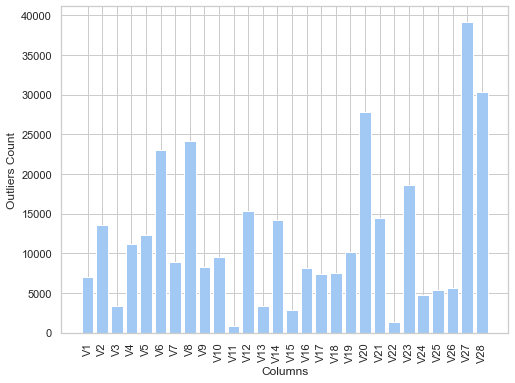

In [29]:
# Create labels and counts for plotting
plt.figure(figsize=(8, 6)) 
labels = outliers_df['Columns']
counts = outliers_df['Outliers_Before_Fixation']



plt.bar(labels, counts)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Outliers Count')
# plt.title('Rows Analysis')
plt.savefig(image_S+"Columns_outliers_values.png", format='png', bbox_inches='tight')
plt.show()


In [30]:
fixed_df_cols.head(5)

,Transaction_Date,Gender,Age_Group,Transaction_City,Merchant_Type,Card_Type,Device_Os,Amount,V1,V2,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Is_Fraudulent
0,2023-12-08,Female,Over 45,Rochdale,Travel,Debit Card,iOS,149.62,-0.920373,-0.072781,...,0.133051,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.091045,-0.021053,0
1,2022-09-22,Other,25 to 30,Kent,Retail,Paypal,Android,2.69,1.191857,0.266151,...,-0.069083,-0.225775,-0.542338,0.101288,-0.339846,0.16717,0.125895,-0.008983,0.014724,0
2,2021-07-07,Other,31 to 35,Rochdale,Retail,Paypal,Windows,378.66,-0.920373,-0.598559,...,0.133051,0.186377,0.528572,0.147642,-0.354568,-0.317145,-0.139097,-0.055353,-0.05296,0
3,2023-10-14,Female,25 to 30,Southampton,Entertainment,Credit Card,Android,123.5,-0.920373,-0.185226,...,-0.208038,-0.1083,0.005274,-0.161846,-0.354568,0.350715,-0.221929,0.062723,0.061458,0
4,2023-12-08,Other,Over 45,London,Entertainment,Credit Card,iOS,69.99,-0.920373,0.803713,...,0.133051,-0.009431,0.528572,-0.137458,0.141267,-0.20601,0.240959,0.091045,0.078279,0


Highlight Outliers Via Box-Plot Method:

In [31]:
top_five_Outliers=outliers_df['Outliers_Before_Fixation'].nlargest(5)
outliers_df[outliers_df['Outliers_Before_Fixation'].isin(top_five_Outliers)]

,Columns,Total_Rows,Outliers_Before_Fixation,Outlier_percentage,Outliers_After_Fixation
5,V6,284807,22965,8.06,0
7,V8,284807,24134,8.47,0
19,V20,284807,27766,9.75,0
26,V27,284807,39162,13.75,0
27,V28,284807,30341,10.65,0


Outliers Via Boxplot

In [32]:
#Method to find outliers with Boxplot

def outlier_Via_BoxPlot(df,col):
# Import libraries
 import matplotlib.pyplot as plt

 fig = plt.figure(figsize =(6, 6))
 data=df[col]
 # Creating plot
 plt.boxplot(data)
 
 # show plot
 plt.show()

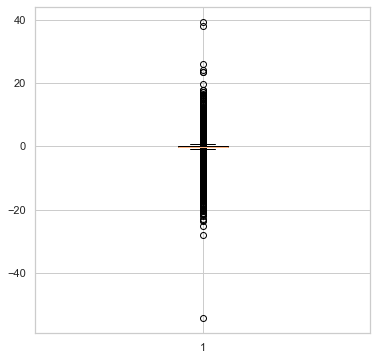

In [33]:
#  , V8 , V20, V27 , V28
outlier_Via_BoxPlot(copy_DF,'V20')


Outliers Via Scatter Plot

In [34]:
def outlier_Via_ScatterPlot(df,col):
    import matplotlib.pyplot as plt


    data=df[col]
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    plt.scatter(range(len(data)), data, color='Green', label='Data')
    plt.scatter(outliers, data[outliers], color='Red', label='Outliers')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

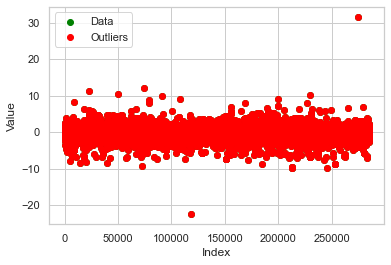

In [35]:
# Amount , V8 , V20, V27 , V28
outlier_Via_ScatterPlot(copy_DF,'V27')

Outliers Via Histogram

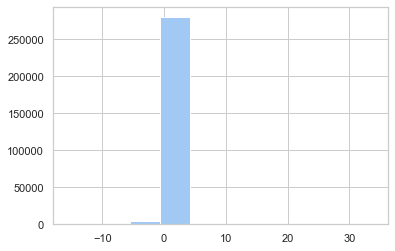

In [36]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(copy_DF['V28'])
# Display the plot
plt.show()

Contextual Information

In [37]:
col_Meta

,Columns_Names,Cols_Dtypes_After,Non_Null_Values,Null_Values,Non_Null_Values_After,Null_Values_After
0,Transaction_Date,datetime64[ns],284807,0,284807,0
1,Gender,string,284793,14,284807,0
2,Age_Group,string,284783,24,284807,0
3,Transaction_City,string,284783,24,284807,0
4,Merchant_Type,string,284807,0,284807,0
5,Card_Type,string,284807,0,284807,0
6,Device_Os,string,284798,9,284807,0
7,Amount,Float64,284797,10,284807,0
8,V1,Float64,284789,18,284807,0
9,V2,Float64,284807,0,284807,0


In [38]:

col_Meta['Unique_Values']=fixed_df_cols.nunique().to_list()
# here you are categories column
categ_thresh=5
col_Meta['Column_Type']= np.where( (col_Meta['Unique_Values']/col_Meta['Non_Null_Values']) * 100 <= categ_thresh, 'Categorical','Non-Categorical') 
col_Meta

,Columns_Names,Cols_Dtypes_After,Non_Null_Values,Null_Values,Non_Null_Values_After,Null_Values_After,Unique_Values,Column_Type
0,Transaction_Date,datetime64[ns],284807,0,284807,0,100,Categorical
1,Gender,string,284793,14,284807,0,3,Categorical
2,Age_Group,string,284783,24,284807,0,5,Categorical
3,Transaction_City,string,284783,24,284807,0,15,Categorical
4,Merchant_Type,string,284807,0,284807,0,3,Categorical
5,Card_Type,string,284807,0,284807,0,3,Categorical
6,Device_Os,string,284798,9,284807,0,3,Categorical
7,Amount,Float64,284797,10,284807,0,32766,Non-Categorical
8,V1,Float64,284789,18,284807,0,138452,Non-Categorical
9,V2,Float64,284807,0,284807,0,135225,Non-Categorical


In [39]:
ordinal_list=['Age_Group']
nominal_list=['Gender','Transaction_City','Merchant_Type','Card_Type','Device_Os','Is_Fraudulent']
# interval_list=['transaction_date','amount','Time','v1 to v28']


conditions = [
col_Meta['Columns_Names'].isin(ordinal_list),
col_Meta['Columns_Names'].isin(nominal_list),
# col_Meta['Columns_Names'].isin(interval_list)
]

values = [
    'Ordinal',
    'Nominal'
]

col_Meta['Contextual_Info']=np.select(conditions, values, default='Interval_Data')
col_Meta

,Columns_Names,Cols_Dtypes_After,Non_Null_Values,Null_Values,Non_Null_Values_After,Null_Values_After,Unique_Values,Column_Type,Contextual_Info
0,Transaction_Date,datetime64[ns],284807,0,284807,0,100,Categorical,Interval_Data
1,Gender,string,284793,14,284807,0,3,Categorical,Nominal
2,Age_Group,string,284783,24,284807,0,5,Categorical,Ordinal
3,Transaction_City,string,284783,24,284807,0,15,Categorical,Nominal
4,Merchant_Type,string,284807,0,284807,0,3,Categorical,Nominal
5,Card_Type,string,284807,0,284807,0,3,Categorical,Nominal
6,Device_Os,string,284798,9,284807,0,3,Categorical,Nominal
7,Amount,Float64,284797,10,284807,0,32766,Non-Categorical,Interval_Data
8,V1,Float64,284789,18,284807,0,138452,Non-Categorical,Interval_Data
9,V2,Float64,284807,0,284807,0,135225,Non-Categorical,Interval_Data


In [40]:

col_context=col_Meta.copy()

col_context=col_context.drop(columns=['Null_Values','Non_Null_Values','Null_Values_After'])

col_context.rename(columns={'Non_Null_Values_After': 'Total_Rows'}, inplace=True)
col_context

,Columns_Names,Cols_Dtypes_After,Total_Rows,Unique_Values,Column_Type,Contextual_Info
0,Transaction_Date,datetime64[ns],284807,100,Categorical,Interval_Data
1,Gender,string,284807,3,Categorical,Nominal
2,Age_Group,string,284807,5,Categorical,Ordinal
3,Transaction_City,string,284807,15,Categorical,Nominal
4,Merchant_Type,string,284807,3,Categorical,Nominal
5,Card_Type,string,284807,3,Categorical,Nominal
6,Device_Os,string,284807,3,Categorical,Nominal
7,Amount,Float64,284807,32766,Non-Categorical,Interval_Data
8,V1,Float64,284807,138452,Non-Categorical,Interval_Data
9,V2,Float64,284807,135225,Non-Categorical,Interval_Data


In [41]:
col_context['Contextual_Info'].value_counts()
col_context['Column_Type'].value_counts()


Non-Categorical    29
Categorical         8
Name: Column_Type, dtype: int64

In [42]:

cross_tab = pd.crosstab(col_context['Column_Type'], col_context['Contextual_Info'])
cross_tab

Contextual_Info,Interval_Data,Nominal,Ordinal
Column_Type,,,
Categorical,1,6,1
Non-Categorical,29,0,0


Here's how you can interpret the table:

There is 1 column that is both "Categorical" and "Interval_Data."
There are 6 columns that are "Categorical" and "Nominal."
There is 1 column that is "Categorical" and "Ordinal."
There are 29 columns that are "Non-Categorical" (not "Categorical") and have no contextual information.

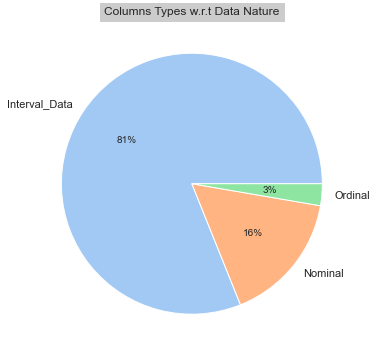

In [43]:
plt.figure(figsize=(6, 6))  # Adjust the size as needed
plt.pie(col_context['Contextual_Info'].value_counts().values, labels = col_context['Contextual_Info'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.title("Columns Types w.r.t Data Nature", bbox={'facecolor':'0.8', 'pad':5})
plt.savefig(image_S+"Contextual_results.png", format='png', bbox_inches='tight')
plt.show()

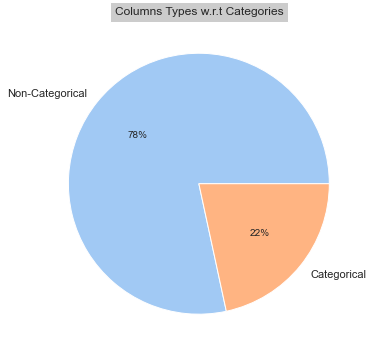

In [44]:



plt.figure(figsize=(6, 6))
plt.pie(col_context['Column_Type'].value_counts().values, labels = col_context['Column_Type'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.title("Columns Types w.r.t Categories", bbox={'facecolor':'0.8', 'pad':5})
plt.savefig(image_S+"Categorical_results.png", format='png', bbox_inches='tight')
plt.show()


Understanding Data Distribution via Descriptive, Quantile and Correlational Analysis

In [45]:
def descriptive_analysis(df):

   col_to_perform=df.select_dtypes(include='number')
   print('col_to_perform',col_to_perform.columns)
   df_Descriptive=pd.DataFrame(index =['Standard Deviation', 'COV', 'Kurtosis', 'Skewness', 'Mean',"Mode",'Median_Absolute_Deviation', 
                                       'Sum', 'Variance'],columns=col_to_perform.columns.to_list()) 
   df_Descriptive=df_Descriptive.transpose()
   
   

   df_Descriptive['Standard Deviation'] = col_to_perform.apply(lambda x: round(x.std(),2) )
   df_Descriptive['COV']=col_to_perform.apply(lambda x: round(x.std()/x.mean(),2) )
   df_Descriptive['Kurtosis']=col_to_perform.apply(lambda x: round(x.kurtosis(),2) )
   df_Descriptive['Skewness']=col_to_perform.apply(lambda x: round(x.skew(),2) )
   df_Descriptive['Mean']=col_to_perform.apply(lambda x: "{:.2f}".format(x.mean())) 
   df_Descriptive['Mode']=col_to_perform.apply(lambda x: "{:.2f}".format(x.mode().iloc[0]))
   # df_Descriptive['Mean_DF']=col_to_perform.mean() 
   df_Descriptive['Sum']=col_to_perform.apply(lambda x: "{:.2f}".format(round(x.sum(),2)))
   df_Descriptive['Variance']=col_to_perform.apply(lambda x: "{:.2f}".format(round(x.var(),2)) )
   df_Descriptive["Median_Absolute_Deviation"] = col_to_perform.apply(lambda x: round(np.abs(x - x.median()).median(),2))
   

   


     
   return df_Descriptive

In [46]:

descriptive_Df=descriptive_analysis(fixed_df_cols)
descriptive_Df

col_to_perform Index(['Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Is_Fraudulent'],
      dtype='object')


,Standard Deviation,COV,Kurtosis,Skewness,Mean,Mode,Median_Absolute_Deviation,Sum,Variance
Amount,250.11,2.83,845.25,16.98,88.35,1.00,20.22,25161811.62,62554.26
V1,0.97,4.68,-1.80,0.03,0.21,-0.92,0.94,58785.18,0.93
V2,0.56,6.10,-1.60,0.05,0.09,-0.60,0.66,26322.88,0.32
V3,0.77,7.47,-1.61,-0.10,0.10,-0.89,0.85,29538.12,0.60
V4,0.65,-12.49,-1.66,-0.01,-0.05,-0.85,0.76,-14846.11,0.42
V5,0.53,-11.90,-1.62,0.02,-0.04,-0.69,0.64,-12607.39,0.28
V6,0.47,-2.18,-1.61,0.14,-0.22,-0.77,0.49,-61560.11,0.22
V7,0.45,29.53,-1.60,-0.04,0.02,-0.55,0.53,4369.70,0.21
V8,0.22,4.67,-1.60,0.13,0.05,0.33,0.23,13168.19,0.05
V9,0.50,-16.67,-1.61,0.03,-0.03,-0.64,0.59,-8539.35,0.25


Distribution Analysis : 

In [47]:

def get_kurtosis_category(x):
    val=''
    if pd.isna(x):
        val = ''
    elif x == 0:
        val = 'Mesokurtic (Normal distribution)'
    elif x > 0:
        val = 'Leptokurtic (Heavy-tailed)'
    elif x < 0:
        val = 'Platykurtic (Light-tailed)'
    else:
        val = 'Undefined'
    return val

In [48]:

def get_skewness_category(x):
    val=''
    if pd.isna(x):
        val = ''
    elif x < -1 or x > 1:
        val = 'Highly-Skewed'
    elif -0.5 <= x <= 0.5:
        val = 'Fairly-Symmetrical'
    elif -1 <= x <= -0.5 or 0.5 <= x <= 1:
        val = 'Moderately-Skewed'
    else:
        val = 'Undefined'
    return val

In [49]:

distribution_DF = descriptive_Df[['Kurtosis','Skewness']]
distribution_DF['Kurtosis_Category']=distribution_DF['Kurtosis'].apply(get_kurtosis_category)
distribution_DF['Skewness_Category']=distribution_DF['Skewness'].apply(get_skewness_category)

distribution_DF


C:\Users\touqe\AppData\Local\Temp\ipykernel_18268\1714813646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribution_DF['Kurtosis_Category']=distribution_DF['Kurtosis'].apply(get_kurtosis_category)
C:\Users\touqe\AppData\Local\Temp\ipykernel_18268\1714813646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribution_DF['Skewness_Category']=distribution_DF['Skewness'].apply(get_skewness_category)


,Kurtosis,Skewness,Kurtosis_Category,Skewness_Category
Amount,845.25,16.98,Leptokurtic (Heavy-tailed),Highly-Skewed
V1,-1.80,0.03,Platykurtic (Light-tailed),Fairly-Symmetrical
V2,-1.60,0.05,Platykurtic (Light-tailed),Fairly-Symmetrical
V3,-1.61,-0.10,Platykurtic (Light-tailed),Fairly-Symmetrical
V4,-1.66,-0.01,Platykurtic (Light-tailed),Fairly-Symmetrical
V5,-1.62,0.02,Platykurtic (Light-tailed),Fairly-Symmetrical
V6,-1.61,0.14,Platykurtic (Light-tailed),Fairly-Symmetrical
V7,-1.60,-0.04,Platykurtic (Light-tailed),Fairly-Symmetrical
V8,-1.60,0.13,Platykurtic (Light-tailed),Fairly-Symmetrical
V9,-1.61,0.03,Platykurtic (Light-tailed),Fairly-Symmetrical


Quantile Analysis:

In [50]:
def quantile_analysis(df):

   col_to_perform=df.select_dtypes(include='number')

   df_quantile=pd.DataFrame(index =['Min', 'Max','Range', 'Fifty_percentile', 'Ninetyfive_percentile', 'First_quntile','Third_quntile', 'Median', 'IQR']
                                 ,columns=col_to_perform.columns.to_list()) 
   df_quantile=df_quantile.transpose()
   
   df_quantile['Min'] = col_to_perform.apply(lambda x: round(x.min(),2))
   df_quantile['Max'] = col_to_perform.apply(lambda x: round(x.max(),2))
   df_quantile['Fifty_percentile'] = col_to_perform.apply(lambda x: round(x.quantile(q=0.5),2))
   df_quantile['Ninetyfive_percentile'] = col_to_perform.apply(lambda x: round(x.quantile(q=0.95),2))
   df_quantile['First_quntile'] = col_to_perform.apply(lambda x: round(x.quantile(q=0.01),2))
   df_quantile['Third_quntile'] = col_to_perform.apply(lambda x: round(x.quantile(q=0.03),2))
   df_quantile['Median'] = col_to_perform.apply(lambda x: str(round(x.median(),2)))


   df_quantile['Range'] = col_to_perform.apply(lambda x: round(x.max()-x.min(),2))
   df_quantile['IQR'] = col_to_perform.apply(lambda x: round(x.quantile(0.75)-x.quantile(0.25),2))


   
   return df_quantile

In [51]:
quant_analysis=quantile_analysis(fixed_df_cols)
quant_analysis

,Min,Max,Range,Fifty_percentile,Ninetyfive_percentile,First_quntile,Third_quntile,Median,IQR
Amount,0.00,25691.16,25691.16,22.00,365.00,0.12,0.77,22.0,71.57
V1,-0.92,1.32,2.24,0.02,1.32,-0.92,-0.92,0.02,2.24
V2,-0.60,0.80,1.40,0.07,0.80,-0.60,-0.60,0.07,1.40
V3,-0.89,1.03,1.92,0.18,1.03,-0.89,-0.89,0.18,1.92
V4,-0.85,0.74,1.59,-0.02,0.74,-0.85,-0.85,-0.02,1.59
V5,-0.69,0.61,1.30,-0.05,0.61,-0.69,-0.69,-0.05,1.30
V6,-0.77,0.40,1.17,-0.27,0.40,-0.77,-0.77,-0.27,1.17
V7,-0.55,0.57,1.12,0.04,0.57,-0.55,-0.55,0.04,1.12
V8,-0.21,0.33,0.54,0.02,0.33,-0.21,-0.21,0.02,0.54
V9,-0.64,0.60,1.24,-0.05,0.60,-0.64,-0.64,-0.05,1.24


Correlational Analysis: Linear Realtion and Rank Based

In [52]:
def get_correlation_detail(df,method_name,no_of_relations):
        
        df_num=df.select_dtypes(include='number')
        corr = df_num.corr(method = ''+method_name)

        c1 = corr.unstack()
        num_rows_to_drop = len(corr)
        c1 = c1.sort_values(ascending=False).iloc[num_rows_to_drop:]
        
        c1 = c1.reset_index()
        c1.columns = ['Column_1', 'Column_2', 'Correlation']
        
        unique_pairs_df = c1.drop_duplicates(subset=['Correlation'])
        unique_pairs_df['Correlation']=round(unique_pairs_df['Correlation'],2)
        unique_pairs_df['Type']=np.where(unique_pairs_df['Correlation']>0,'Directly Proportional','Inversely Proportional')

        top_relations=unique_pairs_df.nlargest(no_of_relations,'Correlation')
        bottom_relations=unique_pairs_df.nsmallest(no_of_relations,'Correlation')
           

        return top_relations,bottom_relations,unique_pairs_df

 

In [53]:
top_via_pearson,bottom_via_pearson,unqiue_pairs_via_pearson=get_correlation_detail(fixed_df_cols,'pearson',5)

C:\Users\touqe\AppData\Local\Temp\ipykernel_18268\1134283702.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_pairs_df['Correlation']=round(unique_pairs_df['Correlation'],2)
C:\Users\touqe\AppData\Local\Temp\ipykernel_18268\1134283702.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_pairs_df['Type']=np.where(unique_pairs_df['Correlation']>0,'Directly Proportional','Inversely Proportional')


In [54]:
top_via_pearson

,Column_1,Column_2,Correlation,Type
0,V21,V22,0.73,Directly Proportional
2,V2,V7,0.50,Directly Proportional
4,V7,V5,0.49,Directly Proportional
6,V6,V8,0.48,Directly Proportional
8,V28,V27,0.45,Directly Proportional


In [55]:
top_via_kendall,bottom_via_kendall,unqiue_pairs_via_kendall=get_correlation_detail(fixed_df_cols,'kendall',5)

C:\Users\touqe\AppData\Roaming\Python\Python39\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\touqe\AppData\Local\Temp\ipykernel_18268\1134283702.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_pairs_df['Correlation']=round(unique_pairs_df['Correlation'],2)
C:\Users\touqe\AppData\Local\Temp\ipykernel_18268\1134283702.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique

In [56]:
top_via_kendall

,Column_1,Column_2,Correlation,Type
0,V21,V22,0.61,Directly Proportional
2,V7,V2,0.39,Directly Proportional
4,V7,V5,0.38,Directly Proportional
6,V8,V6,0.38,Directly Proportional
8,V27,V28,0.37,Directly Proportional


In [57]:
top_via_spearman,bottom_via_spearman,unqiue_pairs_via_spearman=get_correlation_detail(fixed_df_cols,'spearman',5)

C:\Users\touqe\AppData\Local\Temp\ipykernel_18268\1134283702.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_pairs_df['Correlation']=round(unique_pairs_df['Correlation'],2)
C:\Users\touqe\AppData\Local\Temp\ipykernel_18268\1134283702.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_pairs_df['Type']=np.where(unique_pairs_df['Correlation']>0,'Directly Proportional','Inversely Proportional')


In [58]:
top_via_spearman

,Column_1,Column_2,Correlation,Type
0,V21,V22,0.72,Directly Proportional
2,V7,V2,0.49,Directly Proportional
4,V5,V7,0.48,Directly Proportional
6,V6,V8,0.47,Directly Proportional
8,V27,V28,0.46,Directly Proportional


Geographical Overview 

Top five cities with the transaction

In [59]:
fixed_df_cols['Transaction_City'].value_counts().nlargest(5)

# fixed_df_cols.head()


Bradford     19294
Edinburgh    19207
Kent         19131
London       19082
Prestwich    19074
Name: Transaction_City, dtype: Int64

In [60]:
cols=['City','Total_Transactions','Normal_Transactions','Fraud_Transactions']
fraud_by_cities=pd.DataFrame(columns=cols)
cities_value_Count=fixed_df_cols['Transaction_City'].value_counts()
fraud_by_cities['City']=cities_value_Count.index
fraud_by_cities['Total_Transactions']=cities_value_Count.values

fraud_by_cities.sort_values(by='City', inplace=True)
fraud_by_cities=fraud_by_cities.reset_index(drop=True)
fraud_by_cities



,City,Total_Transactions,Normal_Transactions,Fraud_Transactions
0,Birmingham,18696,NaN,NaN
1,Bradford,19294,NaN,NaN
2,Bury,18978,NaN,NaN
3,Cardiff,18996,NaN,NaN
4,Edinburgh,19207,NaN,NaN
5,Kent,19131,NaN,NaN
6,Leeds,18750,NaN,NaN
7,London,19082,NaN,NaN
8,Manchester,19029,NaN,NaN
9,Norwich,18863,NaN,NaN


In [61]:


result=fixed_df_cols.loc[fixed_df_cols['Is_Fraudulent'] == 0, 'Transaction_City'].value_counts()
normal_DF=pd.DataFrame(columns=['City','Normal_Transac'])
normal_DF['City']=result.index
normal_DF['Normal_Transac']=result.values
normal_DF.sort_values(by='City', inplace=True)
normal_DF=normal_DF.reset_index(drop=True)

fraud_by_cities['Normal_Transactions']=np.where(fraud_by_cities['City'].isin(normal_DF['City']),normal_DF['Normal_Transac'],np.nan)
fraud_by_cities['Normal_Transactions']=fraud_by_cities['Normal_Transactions'].astype(int)

fraud_by_cities['Fraud_Transactions']= fraud_by_cities['Total_Transactions'] - fraud_by_cities['Normal_Transactions']
fraud_by_cities

,City,Total_Transactions,Normal_Transactions,Fraud_Transactions
0,Birmingham,18696,18663,33
1,Bradford,19294,19267,27
2,Bury,18978,18941,37
3,Cardiff,18996,18958,38
4,Edinburgh,19207,19176,31
5,Kent,19131,19100,31
6,Leeds,18750,18720,30
7,London,19082,19047,35
8,Manchester,19029,19006,23
9,Norwich,18863,18817,46


In [62]:
from geopy.geocoders import Nominatim



# Geocode the cities to get their latitude and longitude
geolocator = Nominatim(user_agent="city_geocoder")

fraud_by_cities['Latitude']=fraud_by_cities['City'].apply(lambda X: geolocator.geocode(X).latitude)
fraud_by_cities['Longitude']=fraud_by_cities['City'].apply(lambda X: geolocator.geocode(X).longitude)

fraud_by_cities

,City,Total_Transactions,Normal_Transactions,Fraud_Transactions,Latitude,Longitude
0,Birmingham,18696,18663,33,52.479699,-1.902691
1,Bradford,19294,19267,27,53.794423,-1.751919
2,Bury,18978,18941,37,49.313277,2.343934
3,Cardiff,18996,18958,38,51.481655,-3.179193
4,Edinburgh,19207,19176,31,55.953346,-3.188375
5,Kent,19131,19100,31,51.207075,0.721036
6,Leeds,18750,18720,30,53.797418,-1.543794
7,London,19082,19047,35,51.489334,-0.144055
8,Manchester,19029,19006,23,53.479489,-2.245115
9,Norwich,18863,18817,46,52.628558,1.292395


In [63]:
import folium
from folium.plugins import MarkerCluster


# Create a map centered at a specific location

mymap = folium.Map(location=[53.28, 48], zoom_start=8)  # London coordinates

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(mymap)


# Add markers to the MarkerCluster
for lat, lon in zip(fraud_by_cities['Latitude'], fraud_by_cities['Longitude']):
    folium.Marker(location=[lat, lon], popup='Marker').add_to(marker_cluster)



# Calculate bounds of all markers
max_lat, min_lat = max(fraud_by_cities['Latitude']), min(fraud_by_cities['Latitude'])
max_lon, min_lon = max(fraud_by_cities['Longitude']), min(fraud_by_cities['Longitude'])
# Set map bounds to include all markers
mymap.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])
# Save the map as an HTML file
mymap.save("map_with_markers.html")
mymap



Examine Fraudulent Transactions w.r.t Gender, Cities, Age Group , Merchant Type, Card Type, Device Type etc

City Vs Age Group

In [64]:
df_fraudulent=fixed_df_cols[fixed_df_cols['Is_Fraudulent'] == 1]


cross_tab_fraud = pd.crosstab(df_fraudulent['Age_Group'], df_fraudulent['Transaction_City'])
cross_tab_fraud

Transaction_City,Birmingham,Bradford,Bury,Cardiff,Edinburgh,Kent,Leeds,London,Manchester,Norwich,Preston,Prestwich,Rochdale,Salford,Southampton
Age_Group,,,,,,,,,,,,,,,
20 to 25,10,6,6,3,6,6,5,9,4,11,10,6,7,2,11
25 to 30,6,2,5,10,5,9,2,6,6,7,9,5,8,4,8
31 to 35,7,7,5,12,4,4,6,4,4,9,3,2,8,7,6
36 to 45,7,4,11,7,10,3,10,8,4,11,6,11,7,8,7
Over 45,3,8,10,6,6,9,7,8,5,8,8,3,6,8,1


In [65]:

df_fraudulent["Age_Group"].value_counts()  

36 to 45    114
20 to 25    102
Over 45      96
25 to 30     92
31 to 35     88
Name: Age_Group, dtype: Int64

In [66]:
df_fraudulent["Transaction_City"].value_counts()

Norwich        46
Cardiff        38
Bury           37
Rochdale       36
Preston        36
London         35
Birmingham     33
Southampton    33
Edinburgh      31
Kent           31
Leeds          30
Salford        29
Bradford       27
Prestwich      27
Manchester     23
Name: Transaction_City, dtype: Int64

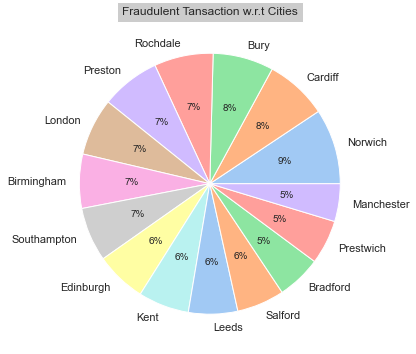

In [67]:
#create pie chart
plt.figure(figsize=(6, 6))
plt.pie(df_fraudulent['Transaction_City'].value_counts().values, labels = df_fraudulent['Transaction_City'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.title("Fraudulent Tansaction w.r.t Cities", bbox={'facecolor':'0.8', 'pad':5})
plt.savefig(image_S+"pie_chart_fraud_cities.png", format='png', bbox_inches='tight')
plt.show()

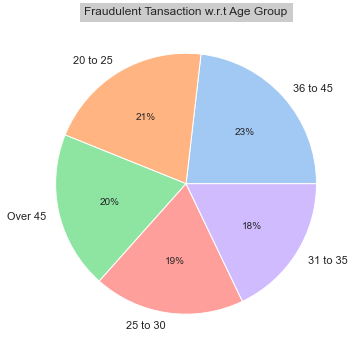

In [68]:

plt.figure(figsize=(6, 6))
plt.pie(df_fraudulent['Age_Group'].value_counts().values, labels = df_fraudulent['Age_Group'].value_counts().index, colors = colors, autopct='%.0f%%')
# plt.title("Pie Chart of Age Group\n" + "Worldwide, Oct 2017 compared to a year ago", bbox={'facecolor':'0.8', 'pad':5})
plt.title("Fraudulent Tansaction w.r.t Age Group", bbox={'facecolor':'0.8', 'pad':5})
plt.savefig(image_S+"pie_chart_fraud_ageGroup.png", format='png', bbox_inches='tight')

plt.show()

In [69]:


cross_tab_activity = pd.crosstab(df_fraudulent['Card_Type'], df_fraudulent['Merchant_Type'])
cross_tab_activity

Merchant_Type,Entertainment,Retail,Travel
Card_Type,,,
Credit Card,51,49,65
Debit Card,39,48,55
Paypal,53,58,74


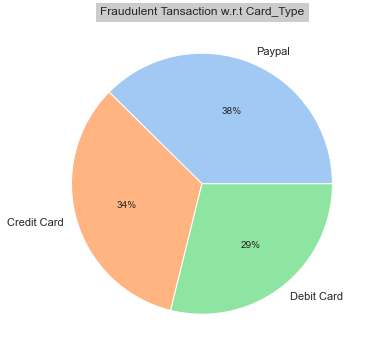

In [70]:
# df_fraudulent['Card_Type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(df_fraudulent['Card_Type'].value_counts().values, labels = df_fraudulent['Card_Type'].value_counts().index, colors = colors, autopct='%.0f%%')
# plt.title("Pie Chart of Age Group\n" + "Worldwide, Oct 2017 compared to a year ago", bbox={'facecolor':'0.8', 'pad':5})
plt.title("Fraudulent Tansaction w.r.t Card_Type", bbox={'facecolor':'0.8', 'pad':5})
plt.savefig(image_S+"pie_chart_fraud_Card_Type.png", format='png', bbox_inches='tight')

plt.show()

In [71]:
df_fraudulent['Merchant_Type'].value_counts()

Travel           194
Retail           155
Entertainment    143
Name: Merchant_Type, dtype: Int64

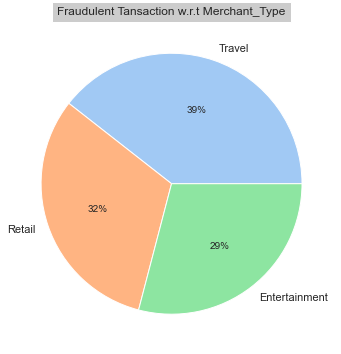

In [72]:
plt.figure(figsize=(6, 6))
plt.pie(df_fraudulent['Merchant_Type'].value_counts().values, labels = df_fraudulent['Merchant_Type'].value_counts().index, colors = colors, autopct='%.0f%%')
# plt.title("Pie Chart of Age Group\n" + "Worldwide, Oct 2017 compared to a year ago", bbox={'facecolor':'0.8', 'pad':5})
plt.title("Fraudulent Tansaction w.r.t Merchant_Type", bbox={'facecolor':'0.8', 'pad':5})
plt.savefig(image_S+"pie_chart_fraud_Merchant_Type.png", format='png', bbox_inches='tight')

plt.show()

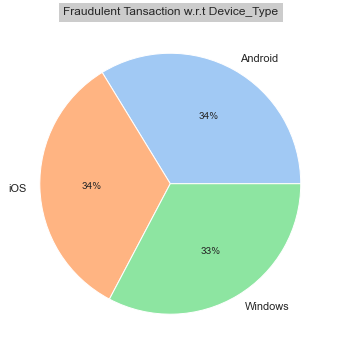

In [73]:
df_fraudulent['Device_Os'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(df_fraudulent['Device_Os'].value_counts().values, labels = df_fraudulent['Device_Os'].value_counts().index, colors = colors, autopct='%.0f%%')
# plt.title("Pie Chart of Age Group\n" + "Worldwide, Oct 2017 compared to a year ago", bbox={'facecolor':'0.8', 'pad':5})
plt.title("Fraudulent Tansaction w.r.t Device_Type", bbox={'facecolor':'0.8', 'pad':5})
plt.savefig(image_S+"pie_chart_fraud_Device_Os_Type.png", format='png', bbox_inches='tight')

plt.show()

History Analysis: Fraudulent Transactions w.r.t Date, Year, Months and Quarter

In [74]:
df_fraudulent

,Transaction_Date,Gender,Age_Group,Transaction_City,Merchant_Type,Card_Type,Device_Os,Amount,V1,V2,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Is_Fraudulent
541,2022-02-02,Female,36 to 45,Salford,Travel,Paypal,iOS,0.0,-0.920373,0.803713,...,0.126911,0.186377,-0.035049,-0.161846,0.320198,0.044519,0.17784,0.091045,-0.05296,1
623,2022-11-06,Male,31 to 35,Cardiff,Travel,Credit Card,Android,529.0,-0.920373,-0.598559,...,0.133051,0.186377,0.435477,0.147642,-0.293803,0.279798,-0.145362,-0.070839,0.035764,1
4920,2023-03-07,Male,20 to 25,Leeds,Travel,Debit Card,Android,239.93,-0.920373,0.803713,...,-0.211721,-0.22839,-0.542338,0.147642,-0.08733,-0.156114,-0.326979,0.039566,-0.05296,1
6108,2023-10-14,Other,20 to 25,Bradford,Entertainment,Credit Card,Windows,59.0,-0.920373,0.803713,...,-0.171608,0.186377,0.176968,-0.161846,-0.053502,0.252405,-0.326979,-0.070839,0.078279,1
6329,2022-10-14,Male,Over 45,Leeds,Travel,Debit Card,Android,1.0,1.234235,0.803713,...,0.009061,-0.22839,-0.542338,-0.161846,-0.354568,0.350715,0.240959,-0.010016,0.078279,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,2022-09-22,Other,36 to 45,Preston,Retail,Debit Card,iOS,390.0,-0.920373,0.803713,...,0.133051,0.186377,-0.319189,0.147642,-0.294885,0.350715,0.240959,0.091045,0.078279,1
280143,2022-06-04,Female,36 to 45,Birmingham,Travel,Paypal,Windows,0.76,1.315642,0.803713,...,0.133051,0.186377,0.028234,-0.14564,-0.081049,0.350715,0.240959,0.091045,0.078279,1
280149,2021-07-18,Male,36 to 45,Kent,Travel,Paypal,Android,77.89,-0.676143,0.803713,...,0.133051,0.186377,0.528572,0.147642,0.03207,-0.317145,0.240959,0.091045,0.078279,1
281144,2021-01-01,Female,36 to 45,Norwich,Travel,Paypal,Android,245.0,-0.920373,0.585864,...,0.133051,0.186377,-0.269209,-0.161846,-0.183659,-0.317145,0.240959,0.091045,-0.05296,1


In [75]:
df_fraudulent['Transaction_Date'].value_counts()

2023-03-29    11
2022-02-13    10
2021-11-28    10
2022-05-13    10
2022-11-28     9
              ..
2022-01-11     2
2022-12-20     2
2023-06-26     2
2021-02-03     2
2022-09-11     1
Name: Transaction_Date, Length: 99, dtype: int64

In [76]:


df_fraudulent['Transaction_Date']=pd.to_datetime(df_fraudulent['Transaction_Date'],format='%d/%m/%Y')
df_fraudulent

C:\Users\touqe\AppData\Local\Temp\ipykernel_18268\905187801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraudulent['Transaction_Date']=pd.to_datetime(df_fraudulent['Transaction_Date'],format='%d/%m/%Y')


,Transaction_Date,Gender,Age_Group,Transaction_City,Merchant_Type,Card_Type,Device_Os,Amount,V1,V2,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Is_Fraudulent
541,2022-02-02,Female,36 to 45,Salford,Travel,Paypal,iOS,0.0,-0.920373,0.803713,...,0.126911,0.186377,-0.035049,-0.161846,0.320198,0.044519,0.17784,0.091045,-0.05296,1
623,2022-11-06,Male,31 to 35,Cardiff,Travel,Credit Card,Android,529.0,-0.920373,-0.598559,...,0.133051,0.186377,0.435477,0.147642,-0.293803,0.279798,-0.145362,-0.070839,0.035764,1
4920,2023-03-07,Male,20 to 25,Leeds,Travel,Debit Card,Android,239.93,-0.920373,0.803713,...,-0.211721,-0.22839,-0.542338,0.147642,-0.08733,-0.156114,-0.326979,0.039566,-0.05296,1
6108,2023-10-14,Other,20 to 25,Bradford,Entertainment,Credit Card,Windows,59.0,-0.920373,0.803713,...,-0.171608,0.186377,0.176968,-0.161846,-0.053502,0.252405,-0.326979,-0.070839,0.078279,1
6329,2022-10-14,Male,Over 45,Leeds,Travel,Debit Card,Android,1.0,1.234235,0.803713,...,0.009061,-0.22839,-0.542338,-0.161846,-0.354568,0.350715,0.240959,-0.010016,0.078279,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,2022-09-22,Other,36 to 45,Preston,Retail,Debit Card,iOS,390.0,-0.920373,0.803713,...,0.133051,0.186377,-0.319189,0.147642,-0.294885,0.350715,0.240959,0.091045,0.078279,1
280143,2022-06-04,Female,36 to 45,Birmingham,Travel,Paypal,Windows,0.76,1.315642,0.803713,...,0.133051,0.186377,0.028234,-0.14564,-0.081049,0.350715,0.240959,0.091045,0.078279,1
280149,2021-07-18,Male,36 to 45,Kent,Travel,Paypal,Android,77.89,-0.676143,0.803713,...,0.133051,0.186377,0.528572,0.147642,0.03207,-0.317145,0.240959,0.091045,0.078279,1
281144,2021-01-01,Female,36 to 45,Norwich,Travel,Paypal,Android,245.0,-0.920373,0.585864,...,0.133051,0.186377,-0.269209,-0.161846,-0.183659,-0.317145,0.240959,0.091045,-0.05296,1


In [77]:
df_fraudulent['Year'] = df_fraudulent['Transaction_Date'].dt.year
df_fraudulent['Month'] = df_fraudulent['Transaction_Date'].dt.strftime('%B')
df_fraudulent['Quarter'] = df_fraudulent['Transaction_Date'].dt.quarter
# df_fraudulent['Month'] = df_fraudulent['Transaction_Date'].dt.month_name
df_fraudulent

C:\Users\touqe\AppData\Local\Temp\ipykernel_18268\2137419692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraudulent['Year'] = df_fraudulent['Transaction_Date'].dt.year
C:\Users\touqe\AppData\Local\Temp\ipykernel_18268\2137419692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraudulent['Month'] = df_fraudulent['Transaction_Date'].dt.strftime('%B')
C:\Users\touqe\AppData\Local\Temp\ipykernel_18268\2137419692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Transaction_Date,Gender,Age_Group,Transaction_City,Merchant_Type,Card_Type,Device_Os,Amount,V1,V2,...,V23,V24,V25,V26,V27,V28,Is_Fraudulent,Year,Month,Quarter
541,2022-02-02,Female,36 to 45,Salford,Travel,Paypal,iOS,0.0,-0.920373,0.803713,...,-0.161846,0.320198,0.044519,0.17784,0.091045,-0.05296,1,2022,February,1
623,2022-11-06,Male,31 to 35,Cardiff,Travel,Credit Card,Android,529.0,-0.920373,-0.598559,...,0.147642,-0.293803,0.279798,-0.145362,-0.070839,0.035764,1,2022,November,4
4920,2023-03-07,Male,20 to 25,Leeds,Travel,Debit Card,Android,239.93,-0.920373,0.803713,...,0.147642,-0.08733,-0.156114,-0.326979,0.039566,-0.05296,1,2023,March,1
6108,2023-10-14,Other,20 to 25,Bradford,Entertainment,Credit Card,Windows,59.0,-0.920373,0.803713,...,-0.161846,-0.053502,0.252405,-0.326979,-0.070839,0.078279,1,2023,October,4
6329,2022-10-14,Male,Over 45,Leeds,Travel,Debit Card,Android,1.0,1.234235,0.803713,...,-0.161846,-0.354568,0.350715,0.240959,-0.010016,0.078279,1,2022,October,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,2022-09-22,Other,36 to 45,Preston,Retail,Debit Card,iOS,390.0,-0.920373,0.803713,...,0.147642,-0.294885,0.350715,0.240959,0.091045,0.078279,1,2022,September,3
280143,2022-06-04,Female,36 to 45,Birmingham,Travel,Paypal,Windows,0.76,1.315642,0.803713,...,-0.14564,-0.081049,0.350715,0.240959,0.091045,0.078279,1,2022,June,2
280149,2021-07-18,Male,36 to 45,Kent,Travel,Paypal,Android,77.89,-0.676143,0.803713,...,0.147642,0.03207,-0.317145,0.240959,0.091045,0.078279,1,2021,July,3
281144,2021-01-01,Female,36 to 45,Norwich,Travel,Paypal,Android,245.0,-0.920373,0.585864,...,-0.161846,-0.183659,-0.317145,0.240959,0.091045,-0.05296,1,2021,January,1


In [78]:
df_fraudulent['Year'].value_counts()

2021    174
2022    159
2023    159
Name: Year, dtype: int64

In [79]:
cross_tab_activity_Hitory_Quater = pd.crosstab(df_fraudulent['Year'], df_fraudulent['Quarter'])
cross_tab_activity_Hitory_Quater

Quarter,1,2,3,4
Year,,,,
2021,49,35,39,51
2022,37,38,40,44
2023,47,39,29,44


In [80]:

cross_tab_activity_History = pd.crosstab(df_fraudulent['Year'], df_fraudulent['Month'])
cross_tab_activity_History

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2021,9,9,14,15,18,16,13,16,13,21,16,14
2022,8,13,14,19,8,18,10,10,20,18,12,9
2023,7,9,13,13,10,13,12,24,20,17,14,7


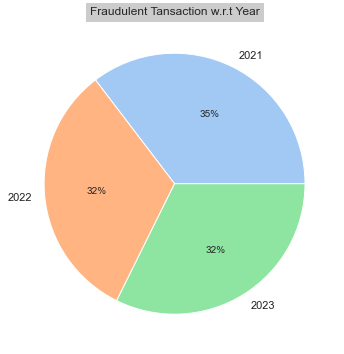

In [81]:
plt.figure(figsize=(6, 6))
plt.pie(df_fraudulent['Year'].value_counts().values, labels = df_fraudulent['Year'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.title("Fraudulent Tansaction w.r.t Year", bbox={'facecolor':'0.8', 'pad':5})
plt.savefig(image_S+"pie_chart_fraud_Year.png", format='png', bbox_inches='tight')

plt.show()

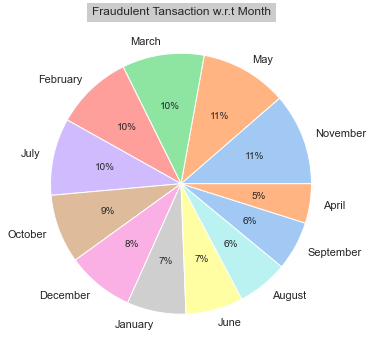

In [82]:
plt.figure(figsize=(6, 6))
plt.pie(df_fraudulent['Month'].value_counts().values, labels = df_fraudulent['Month'].value_counts().index, colors = colors, autopct='%.0f%%')
# plt.title("Pie Chart of Age Group\n" + "Worldwide, Oct 2017 compared to a year ago", bbox={'facecolor':'0.8', 'pad':5})
plt.title("Fraudulent Tansaction w.r.t Month", bbox={'facecolor':'0.8', 'pad':5})
plt.savefig(image_S+"pie_chart_fraud_months.png", format='png', bbox_inches='tight')

plt.show()

In [83]:
df_fraudulent

,Transaction_Date,Gender,Age_Group,Transaction_City,Merchant_Type,Card_Type,Device_Os,Amount,V1,V2,...,V23,V24,V25,V26,V27,V28,Is_Fraudulent,Year,Month,Quarter
541,2022-02-02,Female,36 to 45,Salford,Travel,Paypal,iOS,0.0,-0.920373,0.803713,...,-0.161846,0.320198,0.044519,0.17784,0.091045,-0.05296,1,2022,February,1
623,2022-11-06,Male,31 to 35,Cardiff,Travel,Credit Card,Android,529.0,-0.920373,-0.598559,...,0.147642,-0.293803,0.279798,-0.145362,-0.070839,0.035764,1,2022,November,4
4920,2023-03-07,Male,20 to 25,Leeds,Travel,Debit Card,Android,239.93,-0.920373,0.803713,...,0.147642,-0.08733,-0.156114,-0.326979,0.039566,-0.05296,1,2023,March,1
6108,2023-10-14,Other,20 to 25,Bradford,Entertainment,Credit Card,Windows,59.0,-0.920373,0.803713,...,-0.161846,-0.053502,0.252405,-0.326979,-0.070839,0.078279,1,2023,October,4
6329,2022-10-14,Male,Over 45,Leeds,Travel,Debit Card,Android,1.0,1.234235,0.803713,...,-0.161846,-0.354568,0.350715,0.240959,-0.010016,0.078279,1,2022,October,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,2022-09-22,Other,36 to 45,Preston,Retail,Debit Card,iOS,390.0,-0.920373,0.803713,...,0.147642,-0.294885,0.350715,0.240959,0.091045,0.078279,1,2022,September,3
280143,2022-06-04,Female,36 to 45,Birmingham,Travel,Paypal,Windows,0.76,1.315642,0.803713,...,-0.14564,-0.081049,0.350715,0.240959,0.091045,0.078279,1,2022,June,2
280149,2021-07-18,Male,36 to 45,Kent,Travel,Paypal,Android,77.89,-0.676143,0.803713,...,0.147642,0.03207,-0.317145,0.240959,0.091045,0.078279,1,2021,July,3
281144,2021-01-01,Female,36 to 45,Norwich,Travel,Paypal,Android,245.0,-0.920373,0.585864,...,-0.161846,-0.183659,-0.317145,0.240959,0.091045,-0.05296,1,2021,January,1


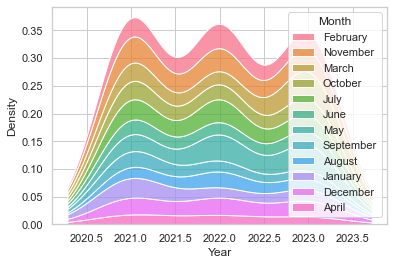

In [84]:
sns.kdeplot(data=df_fraudulent, x="Year", hue="Month", multiple="stack")
plt.savefig(image_S+"Kd_plot_year_month.png", format='png', bbox_inches='tight')


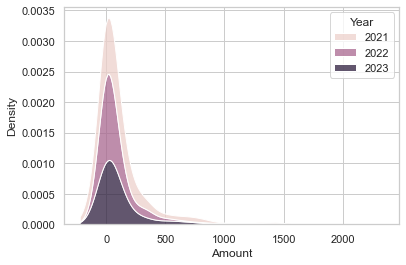

In [85]:
sns.kdeplot(data=df_fraudulent, x="Amount", hue="Year", multiple="stack")
plt.savefig(image_S+"Transaction_year.png", format='png', bbox_inches='tight')


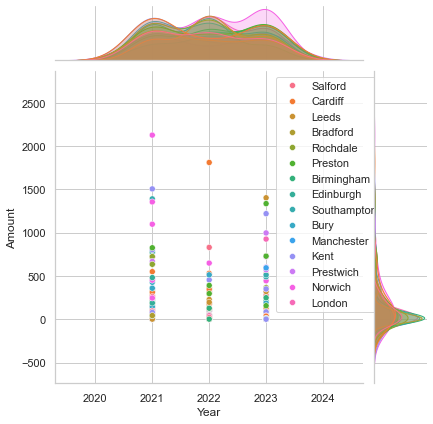

In [86]:
sns.jointplot(data=df_fraudulent, x="Year", y="Amount", hue="Transaction_City").ax_joint.legend(bbox_to_anchor=(0.70, 1))
plt.savefig(image_S+"Joint_plot_Cities_year.png", format='png', bbox_inches='tight')


Other Relations

In [87]:
# sns.barplot(x="DataType", y="Columns_Count", data=DTypes_count)

# # Save the Seaborn plot to an HTML file
# plt.savefig(image_S+"Data_Types.png", format='png', bbox_inches='tight')

# # Display the plot (optional)
# plt.show()


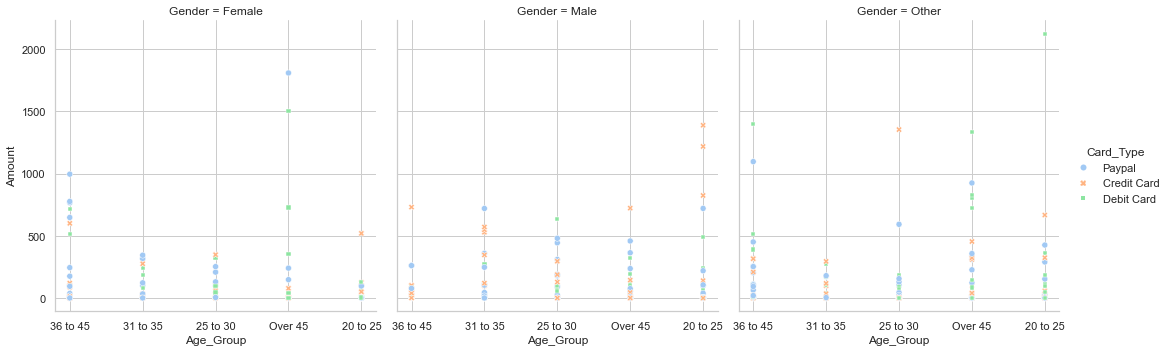

In [88]:
# plt.figure(figsize=(6, 6))
sns.relplot(
    data=df_fraudulent,
    x="Age_Group", y="Amount", col="Gender",
    hue="Card_Type", style="Card_Type"
)
plt.savefig(image_S+"Relation_plot1.png", format='png', bbox_inches='tight')


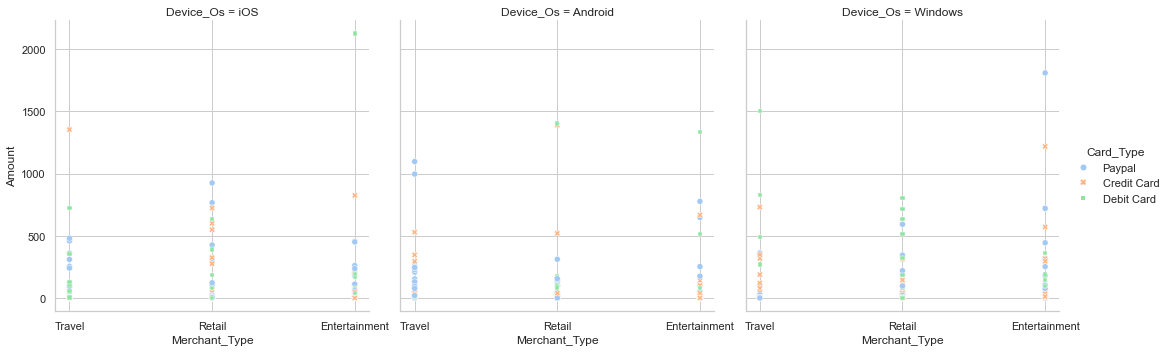

In [89]:
sns.relplot(
    data=df_fraudulent,
    x="Merchant_Type", y="Amount", col="Device_Os",
    hue="Card_Type", style="Card_Type"
)
plt.savefig(image_S+"Relation_plot2.png", format='png', bbox_inches='tight')


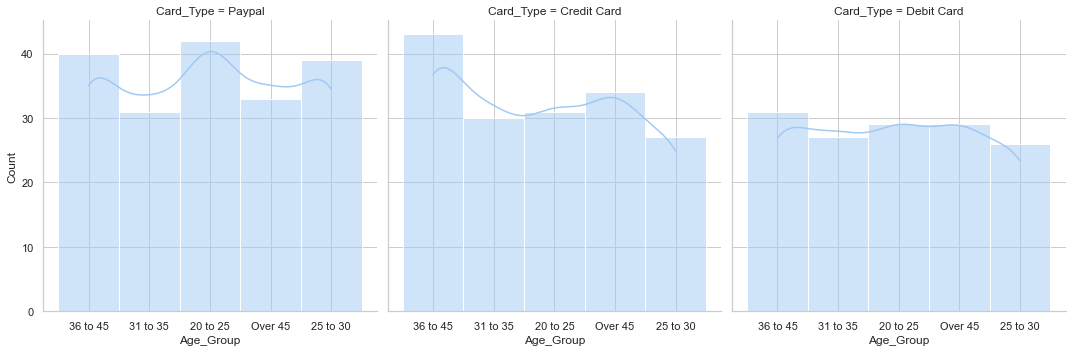

In [90]:
sns.displot(data=df_fraudulent, x="Age_Group", col="Card_Type", kde=True)
plt.savefig(image_S+"Distribution_plot.png", format='png', bbox_inches='tight')


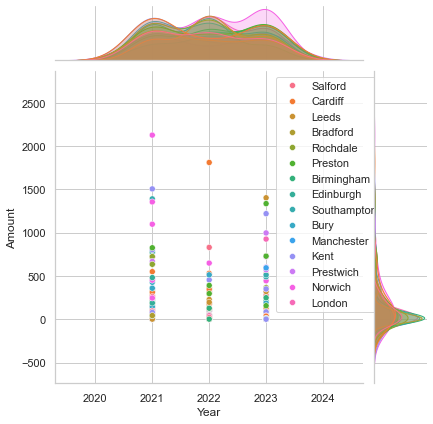

In [91]:
sns.jointplot(data=df_fraudulent, x="Year", y="Amount", hue="Transaction_City").ax_joint.legend(bbox_to_anchor=(0.70, 1))
plt.savefig(image_S+"Joint_plot_Cities.png", format='png', bbox_inches='tight')


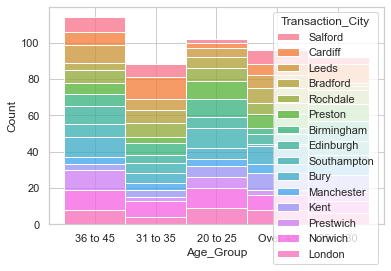

In [92]:
sns.histplot(data=df_fraudulent, x="Age_Group", hue="Transaction_City", multiple="stack")
plt.savefig(image_S+"Hist_plot_cities_ageGroup.png", format='png', bbox_inches='tight')


In [93]:
fixed_df_cols.columns

Index(['Transaction_Date', 'Gender', 'Age_Group', 'Transaction_City',
       'Merchant_Type', 'Card_Type', 'Device_Os', 'Amount', 'V1', 'V2', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24',
       'V25', 'V26', 'V27', 'V28', 'Is_Fraudulent'],
      dtype='object')

Featured Engineering Spliting dates in to Year,Months and Quater and City in to latitude and longitude 

In [143]:
final_data=fixed_df_cols.copy()

final_data['Transaction_Date']=pd.to_datetime(final_data['Transaction_Date'],format='%d/%m/%Y')
final_data['Year'] = final_data['Transaction_Date'].dt.year
final_data['Month'] = final_data['Transaction_Date'].dt.strftime('%B')
final_data['Quater'] = final_data['Transaction_Date'].dt.quarter
final_data.head()

,Transaction_Date,Gender,Age_Group,Transaction_City,Merchant_Type,Card_Type,Device_Os,Amount,V1,V2,...,V23,V24,V25,V26,V27,V28,Is_Fraudulent,Year,Month,Quater
0,2023-12-08,Female,Over 45,Rochdale,Travel,Debit Card,iOS,149.62,-0.920373,-0.072781,...,-0.110474,0.066928,0.128539,-0.189115,0.091045,-0.021053,0,2023,December,4
1,2022-09-22,Other,25 to 30,Kent,Retail,Paypal,Android,2.69,1.191857,0.266151,...,0.101288,-0.339846,0.16717,0.125895,-0.008983,0.014724,0,2022,September,3
2,2021-07-07,Other,31 to 35,Rochdale,Retail,Paypal,Windows,378.66,-0.920373,-0.598559,...,0.147642,-0.354568,-0.317145,-0.139097,-0.055353,-0.05296,0,2021,July,3
3,2023-10-14,Female,25 to 30,Southampton,Entertainment,Credit Card,Android,123.5,-0.920373,-0.185226,...,-0.161846,-0.354568,0.350715,-0.221929,0.062723,0.061458,0,2023,October,4
4,2023-12-08,Other,Over 45,London,Entertainment,Credit Card,iOS,69.99,-0.920373,0.803713,...,-0.137458,0.141267,-0.20601,0.240959,0.091045,0.078279,0,2023,December,4


Add geographical coordinates e.g lat/long  as it will helpfull for mapping

In [144]:

final_data = pd.merge(final_data, fraud_by_cities[['City', 'Latitude', 'Longitude']], how='left', left_on='Transaction_City', right_on='City')


In [146]:
final_data.head()

,Transaction_Date,Gender,Age_Group,Transaction_City,Merchant_Type,Card_Type,Device_Os,Amount,V1,V2,...,V26,V27,V28,Is_Fraudulent,Year,Month,Quater,City,Latitude,Longitude
0,2023-12-08,Female,Over 45,Rochdale,Travel,Debit Card,iOS,149.62,-0.920373,-0.072781,...,-0.189115,0.091045,-0.021053,0,2023,December,4,Rochdale,53.615366,-2.155756
1,2022-09-22,Other,25 to 30,Kent,Retail,Paypal,Android,2.69,1.191857,0.266151,...,0.125895,-0.008983,0.014724,0,2022,September,3,Kent,51.207075,0.721036
2,2021-07-07,Other,31 to 35,Rochdale,Retail,Paypal,Windows,378.66,-0.920373,-0.598559,...,-0.139097,-0.055353,-0.05296,0,2021,July,3,Rochdale,53.615366,-2.155756
3,2023-10-14,Female,25 to 30,Southampton,Entertainment,Credit Card,Android,123.5,-0.920373,-0.185226,...,-0.221929,0.062723,0.061458,0,2023,October,4,Southampton,50.902535,-1.404189
4,2023-12-08,Other,Over 45,London,Entertainment,Credit Card,iOS,69.99,-0.920373,0.803713,...,0.240959,0.091045,0.078279,0,2023,December,4,London,51.489334,-0.144055


In [97]:
csv_file_path = 'DataSet/Transformed_Fraud_Credit_Card.csv'
# Save the DataFrame as a CSV file
transformed_df=final_data.head(100) 
transformed_df.to_csv(csv_file_path, index=False)

MACHINE LEARNING (Classification Problem)


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



'Column_0', 'Transaction_Date', 'Gender', 'Age_Group',
       'Transaction_City', 'Merchant_Type', 'Card_Type', 'Device_Os', 'Amount',
       'Column_9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Is_Fraudulent'

In [100]:
# X = fixed_df_cols[['Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9','V10','V11', 'V12','V13', 'V14', 'V15','V16', 'V17','V18','V19','V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]


label_encoder = LabelEncoder()

X = fixed_df_cols[['Amount','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9','V10','V11', 'V12','V13', 'V14', 'V15','V16', 'V17','V18','V19','V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]

y = fixed_df_cols['Is_Fraudulent']
y_train_encoded = label_encoder.fit_transform(y)



X_train, X_test, y_train, y_test = train_test_split(X, y_train_encoded, train_size=0.2, random_state=42)




In [101]:
y_train_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
def find_best_Model(row,X_train, X_test, y_train, y_test):
    
    

    # model_name = row['Model']
    model_lambda = row['model_lambda']

    model=model_lambda()
    model.fit(X_train, y_train)
    y_Prediction=model.predict(X_test)
    

    
    score=accuracy_score(y_test,y_Prediction)
    
    precision=precision_score(y_test, y_Prediction)
    
    recall=recall_score(y_test, y_Prediction)
    
    fscore=f1_score(y_test, y_Prediction)
    
    
    row['Accuracy']=score
    row['Precision']=precision
    row['Recall']=recall
    row['F1_score']=fscore

    # print("confusion_matrix", confusion_matrix(y_test, y_Prediction))

    return row


Below code will take 15M 40.2 seconds

In [103]:
models_df = pd.DataFrame([
    {'Model': 'Logistic Regression', 'model_lambda': lambda: LogisticRegression(max_iter=600)},
    {'Model': 'Random Forest', 'model_lambda': lambda: RandomForestClassifier(n_estimators=100, random_state=42)},
    {'Model': 'Decision Tree', 'model_lambda': lambda: DecisionTreeClassifier()},
    {'Model': 'SVM', 'model_lambda': lambda: SVC()},
    {'Model': 'KNN', 'model_lambda': lambda: KNeighborsClassifier()},
     
])




rowDF= models_df.apply(find_best_Model, axis=1, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)




c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
c:\ProgramData\Anaconda3

In [114]:
Model_Score=rowDF.drop('model_lambda', axis=1)
Model_Score['Average'] = round(Model_Score[['Accuracy', 'Precision', 'Recall', 'F1_score']].mean(axis=1),2)
Model_Score = Model_Score.sort_values(by='Average', ascending=False)
Model_Score

,Model,Accuracy,Precision,Recall,F1_score,Average
1,Random Forest,0.999399,0.928082,0.700258,0.798233,0.86
0,Logistic Regression,0.999298,0.844985,0.718346,0.776536,0.83
2,Decision Tree,0.998929,0.681013,0.695090,0.687980,0.77
4,KNN,0.998916,0.880435,0.418605,0.567426,0.72
3,SVM,0.998301,0.000000,0.000000,0.000000,0.25


There is another approach like Random Over Sampler OR Random Under Sampler to deals with the minority.

In [105]:
# from imblearn.over_sampling import RandomOverSampler

# # Assuming you have features X and labels y
# oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)

# X_Over_resampled, y_Over_resampled = oversampler.fit_resample(X, y_train_encoded)



# X_train_Over_resampled, X_test_Over_resampled, y_train_Over_resampled, y_test_Over_resampled = train_test_split(X_Over_resampled, y_Over_resampled, train_size=0.2, random_state=42)


# rowDF_OverSample= models_df.apply(find_best_Model, axis=1, X_train=X_train_Over_resampled, y_train=y_train_Over_resampled, X_test=X_test_Over_resampled, y_test=y_test_Over_resampled)

# Model_Score_OverSample=rowDF_OverSample.drop('model_lambda', axis=1)

Random UnderSampler Approach

In [106]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming you have features X and labels y

undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)


X_resampled, y_resampled = undersampler.fit_resample(X, y_train_encoded)


X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, train_size=0.2, random_state=42)

rowDF_resampled= models_df.apply(find_best_Model, axis=1, X_train=X_train_resampled, y_train=y_train_resampled, X_test=X_test_resampled, y_test=y_test_resampled)

Model_Score_resampled=rowDF_resampled.drop('model_lambda', axis=1)



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check

Finding Best Model for Undersampler Data

In [107]:
# Rows included
print("Rows are",len(X_resampled))

Rows are 1476


In [112]:
Model_Score_resampled['Average'] = round(Model_Score_resampled[['Accuracy', 'Precision', 'Recall', 'F1_score']].mean(axis=1),2)
Model_Score_resampled = Model_Score_resampled.sort_values(by='Average', ascending=False)
Model_Score_resampled

,Model,Accuracy,Precision,Recall,F1_score,Average
1,Random Forest,0.948349,0.951841,0.884211,0.916780,0.93
0,Logistic Regression,0.935648,0.893782,0.907895,0.900783,0.91
2,Decision Tree,0.872989,0.771226,0.860526,0.813433,0.83
4,KNN,0.804403,0.717201,0.647368,0.680498,0.71
3,SVM,0.675699,0.470588,0.063158,0.111369,0.33


Conclusion: Based on metrices, Random Forest and Logistic Regression are the most efficient one as comapred to others.  

Coverted all DF to HTML for HTML Reporting

In [147]:
cols_analysis=col_DF.to_html()


col_DataTypes=col_DTypes.to_html()
dataType_count=DTypes_count.to_html()

initial_meta_data_html=meta_with_NullValues.to_html()
final_meta_data_html=fixed_col_Meta.to_html()
outliers_html=outliers_df.to_html()

col_context_html=col_context.to_html()
cross_tab_html=cross_tab.to_html()


descriptive_Df_html=descriptive_Df.to_html()
quant_html=quant_analysis.to_html()
dist_html=distribution_DF.to_html()


top_via_pearson_html=top_via_pearson.to_html()
top_via_kendall_html =top_via_kendall.to_html()
top_via_spearman_html=top_via_spearman.to_html()



fraud_by_cities_html=fraud_by_cities.to_html()
cross_tab_fraud_html=cross_tab_fraud.to_html()
cross_tab_activity_html=cross_tab_activity.to_html()
cross_tab_activity_History_html=cross_tab_activity_History.to_html()
cross_tab_activity_Hitory_Quater_html=cross_tab_activity_Hitory_Quater.to_html()


Model_Score_html=Model_Score.to_html()
Model_Score_resampled_html=Model_Score_resampled.to_html()
df_top_values=final_data.head(10).to_html()


In [117]:


file = open("Credit-Card-Fraud-Classification-Case-Study.html","w")

file.write("<html><center>\n<head>\
            \n<title> \nRana Analysis-HTML\n \
            </title>\n <link rel='stylesheet' href='https://maxcdn.bootstrapcdn.com/bootstrap/3.4.1/css/bootstrap.min.css'><script src='https://ajax.googleapis.com/ajax/libs/jquery/3.6.0/jquery.min.js'></script><script src='https://maxcdn.bootstrapcdn.com/bootstrap/3.4.1/js/bootstrap.min.js'></script> <style>table {border-collapse: collapse;}th, td {padding: 2px;text-align: center;border-bottom: 4px solid#ddd;}tr:hover {background-color: coral;}</style> </head> <body> <div class='container'>"
            +"<h2> \
            <font>Credit-Card-Fraud-Classification-Case-Study-Detecting-Fraud-with-ML</font></h2>"
            +"<h3>Note: This data set is for learning perspective only, as its the mixture of two datasets(mockaroo + european data).The data with columns V1,V2,V3..V28 are the Principle components obtained with PCA. </h3>"
            +"<h3><b> Data Overview</h3>" 
            +"<h4>Column Name Analysis:</b></h4>" 
            +"<h4> Identifying and addressing anomalies such as special characters, unnamed columns, numeric column names, and spaces.</h4>"+cols_analysis 
            +"<h4>\n<b>Column's DataType Analysis:</b></h4>" 
            +"<h4>Converting data types to the most suitable types for enhanced consistency and compatibility within the dataset.</h4>"+col_DataTypes 
            +"<h4>\n<b>DataType Highlights:</b></h4>\n"+"<img src='"+image_S+"pie_chart_data_types.png' alt='Note:Invalid directory or no name found.'>"            
            +"<h4>Details Table for Data Types.</h4>"+dataType_count
            +"<h3>\n<b>MetaData Analysis:</b></h3>"
            +"<h3>\n<b>Rows Analysis:</b></h3>\n"+"<img src='"+image_S+"Rows_analysis.png' alt='Note:Invalid directory or no name found.'>"            
            +"<h3>\n<b>Columns Analysis:</b></h3>"
            +"<h5>\n<b>Before proceeding with contextual or further analysis, I found the following details regarding anomalies, missing values, or outliers.</b></h3>"
            +"<h4>\n<b>Before Handling Null or Missing Values.</b></h4>"+"<img src='"+image_S+"Columns_missing_values.png' alt='Note:Invalid directory or no name found.'>"
            +"<h4>\n<b>After Fixing Null or Missing Values.</b></h4>"+final_meta_data_html
            +"<h4>\n<b>Before Imputing Outliers.</b></h4>"+"<img src='"+image_S+"Columns_outliers_values.png' alt='Note:Invalid directory or no name found.'>"
            +"<h4>\n <b>After handling outliers.</b></h4>"+outliers_html
            

             +"<h4><b>Analysis by Column Context and Category</b></h4>"
             +"<h4>After fixing missing values and outliers, each column is observed on the basis of type,unqiue values and distribution. </h4>"+col_context_html
             
            +"<h4><br>Cross tabulation between Column_Type and its Contextual_Info columns.</h4>"+cross_tab_html
            +"<h4>1 column that is both Categorical and have Interval_Data.<br>6 columns that are Categorical and have Nominal data.<br>1 column that is Categorical and have Ordinal values.<br>29 columns that are Non-Categorical and have Interval Data.</h4>"
            +"<h4>Column's Contextual Information:\n</h4>\n"+"<img src='"+image_S+"Contextual_results.png' alt='Note:Invalid directory or no name found.'>"
            +"<h4>Column's Categories:\n</h4>\n"+"<img src='"+image_S+"Categorical_results.png' alt='Note:Invalid directory or no name found.'>"
            
            +"<h4>\n<b>Descriptive Analysis:</b></h4>"+descriptive_Df_html
            +"<h4>\n<b>Quantile Analysis:</b></h4>"+quant_html
            +"<h4>\n<b>Distribution Analysis:</b></h4>"+dist_html
            +"<h4>\n<b>Top Five Correlations:</b></h4>"
            +"<h4>\n<b>Correlational Analysis Via Pearson (Linear Relation)</b></h4>"+top_via_pearson_html
            +"<h4>\n<b>Correlational Analysis Via Kendall (Rank Based)</b></h4>"+top_via_kendall_html
            +"<h4>\n<b>Correlational Analysis Via Spearman (Rank Based)</b></h4>"+top_via_spearman_html
            
            
          
            +"<h4>\n<b>Geographical Analysis:</b></h4>"
            +"<h4>\nList of all cities with their respective total transactions and fraudulent transactions. </b></h4>"+fraud_by_cities_html
            +"<h4>Map\n</h4>\n"+"<iframe src='map_with_markers.html' width='800' height='600' frameborder='0' scrolling='no'></iframe>"
            +"<h4>\n<b>Fraudulent Transactions w.r.t Age Group</b></h4>"+cross_tab_fraud_html
            +"<h4>\n <b>Overall Fraudulent Transactions w.r.t Age Group </b></h4>"
            +"\n"+"<img src='"+image_S+"pie_chart_fraud_cities.png' alt='Note:Invalid directory or no name found.'>"
            +"\n"+"<img src='"+image_S+"pie_chart_fraud_ageGroup.png' alt='Note:Invalid directory or no name found.'>"
            +"<h4>\n<b>Fraudulent Transactions w.r.t Card_Type and Merchant_Type :</b></h4>"+cross_tab_activity_html
            +"<h4>\n <b>Overall Fraudulent Transactions w.r.t Card_Type and Merchant_Type </b></h4>"
            +"\n"+"<img src='"+image_S+"pie_chart_fraud_Card_Type.png' alt='Note:Invalid directory or no name found.'>"
            +"\n"+"<img src='"+image_S+"pie_chart_fraud_Merchant_Type.png' alt='Note:Invalid directory or no name found.'>"
            +"\n"+"<img src='"+image_S+"pie_chart_fraud_Device_Os_Type.png' alt='Note:Invalid directory or no name found.'>"
            +"<h4>Fraudulent Transactions w.r.t Age_Group,Gender,Amount and Card_Type:\n</h4>\n"+"<img src='"+image_S+"Relation_plot1.png' alt='Note:Invalid directory or no name found.'>"
            +"<h4>Fraudulent Transactions w.r.t Merchant_Type,Card_Type,Device_Type and Amount:\n</h4>\n"+"<img src='"+image_S+"Relation_plot2.png' alt='Note:Invalid directory or no name found.'>"
            


            +"<h4>\n<b>Fraudulent History Analysis:</b></h4>"+cross_tab_activity_History_html
            
            +"<h4>\n <b>Overall Fraudulent Transactions w.r.t Year and Quarter </b></h4>"+cross_tab_activity_Hitory_Quater_html
            
            +"<h4>\n <b>Overall Fraudulent Transactions w.r.t Year and Month </b></h4>"
            +"\n"+"<img src='"+image_S+"pie_chart_fraud_Year.png' alt='Note:Invalid directory or no name found.'>"
            +"\n"+"<img src='"+image_S+"pie_chart_fraud_months.png' alt='Note:Invalid directory or no name found.'>"
            +"<h4>\n<b>Fraudulent Transactions w.r.t History,Amount and City</b></h4>"+"<img src='"+image_S+"Joint_plot_Cities_year.png' alt='Note:Invalid directory or no name found.'>"


            +"<h4>\n<b>Finding best Model for Machine Learning (Classification Problem)</b></h4>"+Model_Score_html
            +"<h4>\n<b>Finding best Model for Machine Learning Via UnderSampling (Classification Problem)</b></h4>"+Model_Score_resampled_html
            +"<h4>\n <b>Conclusion: Based on metrices, Random Forest and Logistic Regression are the most efficient one as comapred to others. </b></h4>"
            +"<h4>\n<b>Sample Data (First 10 Rows):</b></h4>"+df_top_values
           
             
            +"</div></body></center></html>")
     
file.close()   